# Hudson and Thames' Minimum Spanning Tree Challenge
Submission by @changchuanhong


# Introduction
This notebook submission would demonstrate my implementation of Krustal's algorithm with 50 randomly selected SP500 stock close data.


In [12]:
# Randomly select 50 stock tickers from the SPX index.

import utils
import KrustalMST
import unittests
import yfinance as yf
import numpy as np
import pandas as pd

sample = utils.getSPXTickers(count = 50)

print('List of tickers selected: {}'.format(sample))

List of tickers selected: ['GPS', 'KHC', 'SYK', 'HPE', 'IFF', 'WMB', 'ALGN', 'BR', 'NWS', 'ICE', 'ABC', 'NBL', 'WHR', 'JBHT', 'DUK', 'RMD', 'HRL', 'CHTR', 'PLD', 'CE', 'JCI', 'RTX', 'AXP', 'CHD', 'MLM', 'COF', 'MXIM', 'HAL', 'HPQ', 'XLNX', 'ZION', 'PVH', 'BSX', 'WFC', 'PRU', 'IPG', 'HUM', 'PFG', 'REG', 'MAA', 'IBM', 'AMAT', 'HAS', 'PM', 'NKE', 'CVX', 'AIZ', 'BWA', 'ETFC', 'ULTA']


In [13]:
# Retrieve the closing prices of the selected stocks.

close = pd.DataFrame()
for i in sample:
    current_ticker = yf.Ticker(i)
    close = pd.concat([close, current_ticker.history(period = 'max')['Close'].dropna()], axis = 1)

close.columns = sample
close.tail(5) 

,GPS,KHC,SYK,HPE,IFF,WMB,ALGN,BR,NWS,ICE,ABC,NBL,WHR,JBHT,DUK,RMD,HRL,CHTR,PLD,CE,JCI,RTX,AXP,CHD,MLM,COF,MXIM,HAL,HPQ,XLNX,ZION,PVH,BSX,WFC,PRU,IPG,HUM,PFG,REG,MAA,IBM,AMAT,HAS,PM,NKE,CVX,AIZ,BWA,ETFC,ULTA
2020-07-16 00:00:00,13.07,34.40,186.59,9.72,129.61,19.90,309.00,127.46,12.79,92.37,102.74,9.95,144.31,132.55,81.07,195.82,49.53,558.03,92.10,90.59,37.17,62.37,96.32,84.20,223.09,63.36,69.54,13.09,17.83,99.17,33.39,51.26,36.37,25.46,64.25,18.20,395.89,44.76,42.10,112.02,124.01,62.34,77.51,75.35,97.26,88.36,105.07,37.77,54.37,203.18
2020-07-17 00:00:00,12.89,35.01,193.05,9.67,130.99,19.77,322.30,129.10,12.80,93.83,104.45,9.65,142.56,136.82,82.40,199.00,49.92,564.66,95.34,89.53,37.67,62.20,95.18,84.87,223.55,61.99,70.04,13.08,17.55,100.49,32.56,49.23,37.71,24.95,64.14,18.00,404.49,44.51,41.70,112.92,125.11,62.30,77.49,75.03,96.28,87.19,104.17,37.49,54.14,203.00
2020-07-20 00:00:00,12.41,34.12,190.68,9.55,128.72,19.29,312.97,129.32,12.73,94.25,102.19,10.18,143.06,134.40,81.10,203.01,49.70,565.51,94.73,91.79,36.80,61.41,94.00,84.29,221.44,60.84,71.37,13.41,17.65,103.03,32.02,47.34,37.17,24.57,63.02,17.45,396.76,43.86,41.17,110.02,126.37,63.73,78.00,72.89,95.65,85.27,103.21,37.77,53.55,200.06
2020-07-21 00:00:00,12.77,34.53,192.51,9.66,127.94,20.11,315.33,129.95,12.76,95.11,104.15,10.97,143.76,133.03,82.33,204.40,49.75,564.68,97.93,93.63,36.71,63.05,96.33,84.50,225.69,62.87,69.00,14.32,17.48,102.15,33.74,49.02,37.48,26.20,64.99,17.68,397.59,44.80,40.58,109.36,126.06,63.81,78.83,75.92,98.36,91.39,104.70,37.70,54.08,201.96
2020-07-22 00:00:00,12.54,34.56,193.80,9.69,129.35,19.39,316.06,130.61,12.87,95.17,102.95,10.71,147.79,134.49,82.13,205.46,49.15,564.22,98.61,93.55,36.85,62.75,96.74,84.01,227.21,63.57,69.39,14.21,17.60,103.49,33.30,49.29,38.34,25.95,64.85,17.74,396.93,44.84,40.88,110.66,128.76,64.39,79.25,74.27,98.64,89.56,105.19,38.12,53.76,203.78


### Compute the distance matrix

The distance metrix is implemented as described by the paper referenced in the challenge. 


In [14]:
# Compute the distance matrix with the methodology provided in the paper
close_returns = np.log10(close) - np.log10(close).shift(1)
distance_matrix = np.sqrt(2*(1 - close_returns.corr(method ='pearson')))
print('Distance Matrix of dimension {} generated'.format(distance_matrix.shape))

# Data sanity check
if distance_matrix.isnull().values.any():
    print('There might be bad tickers or that yFinance has not retrieved the required data correctly.')
distance_matrix.head()

Distance Matrix of dimension (50, 50) generated


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


,GPS,KHC,SYK,HPE,IFF,WMB,ALGN,BR,NWS,ICE,ABC,NBL,WHR,JBHT,DUK,RMD,HRL,CHTR,PLD,CE,JCI,RTX,AXP,CHD,MLM,COF,MXIM,HAL,HPQ,XLNX,ZION,PVH,BSX,WFC,PRU,IPG,HUM,PFG,REG,MAA,IBM,AMAT,HAS,PM,NKE,CVX,AIZ,BWA,ETFC,ULTA
GPS,0.000000,1.239796,1.266677,1.063069,1.231160,1.304376,1.252741,1.151414,1.097728,1.184746,1.278147,1.265879,1.194457,1.231863,1.276237,1.285844,1.343954,1.246253,1.177863,1.119922,1.213487,1.171010,1.160586,1.360214,1.180188,1.133554,1.253471,1.253381,1.240812,1.240105,1.266704,1.186504,1.243987,1.257486,1.073752,1.217263,1.302580,1.085690,1.169545,1.197448,1.231986,1.246663,1.234153,1.151657,1.244593,1.231409,1.126476,1.157439,1.218394,1.140828
KHC,1.239796,0.000000,1.114407,1.148214,1.094590,1.209372,1.183600,1.146327,1.160607,1.139260,1.167476,1.212083,1.119859,1.116234,1.086999,1.194861,1.124106,1.181767,1.050350,1.147799,1.109725,1.157738,1.118732,1.156318,1.203300,1.117153,1.142124,1.151429,1.197478,1.175538,1.174953,1.142896,1.145488,1.081563,1.055824,1.095257,1.183773,1.087244,1.141580,1.106534,1.082513,1.138469,1.196498,1.068918,1.145719,1.117527,1.163703,1.174652,1.106990,1.244013
SYK,1.266677,1.114407,0.000000,1.002514,1.221168,1.328291,1.194917,1.023650,1.056205,1.097191,1.219089,1.261789,1.230329,1.249904,1.264847,1.226980,1.323115,1.130763,1.160213,1.061827,1.239655,1.191113,1.200217,1.349014,1.182964,1.173982,1.245858,1.251920,1.267065,1.237653,1.250341,1.254540,1.165488,1.258533,1.035832,1.254685,1.253107,1.040572,1.170635,1.180448,1.256409,1.253769,1.309760,1.037039,1.278367,1.244308,1.099202,1.178585,1.232020,1.134141
HPE,1.063069,1.148214,1.002514,0.000000,1.073172,1.110994,1.068601,1.094125,1.013137,1.076650,1.149955,1.049596,1.020379,1.049048,1.191128,1.181769,1.269529,1.155211,1.081172,0.949831,1.026061,0.956510,0.965652,1.267991,1.081222,0.916412,1.003843,1.027494,0.920888,1.043276,0.942962,0.986624,1.044093,0.949632,0.862987,0.986682,1.125464,0.872328,1.094091,1.131459,0.946087,0.986297,1.093438,1.134017,1.003596,1.011269,1.079396,0.989391,0.948777,1.124139
IFF,1.231160,1.094590,1.221168,1.073172,0.000000,1.296168,1.214043,1.058404,1.081147,1.115406,1.224955,1.223493,1.171529,1.212037,1.192663,1.259131,1.281774,1.157885,1.097763,0.990021,1.206409,1.135188,1.133003,1.324490,1.129722,1.144736,1.240305,1.194854,1.263135,1.240581,1.222506,1.217513,1.215362,1.219691,1.010611,1.199169,1.244872,1.021535,1.137714,1.136583,1.177517,1.235323,1.285515,1.061378,1.272863,1.201539,1.038395,1.120169,1.218063,1.158548


### Compute the Adjacency Matrix


In [16]:
mst = KrustalMST.MST(distance_matrix)
adjacency_matrix = mst.buildMST()

In [ ]:
import pandas as pd

df = pd.read_csv('collected_courses.csv')
df = df[df['Prerequisite'].str.contains(' OR', case = True, regex = False).notnull()]
df = df[df['Prerequisite'].str.contains(' OR', case = True, regex = False)]

# Visualization of the data

### Plot of the Minimum Spanning Tree

There are several distinct clusters found by the MST algorithm. For example, Prudential, Zions Bancorporation and Wells Fargo are closely interlinked which is to be expected since these are financial companies.



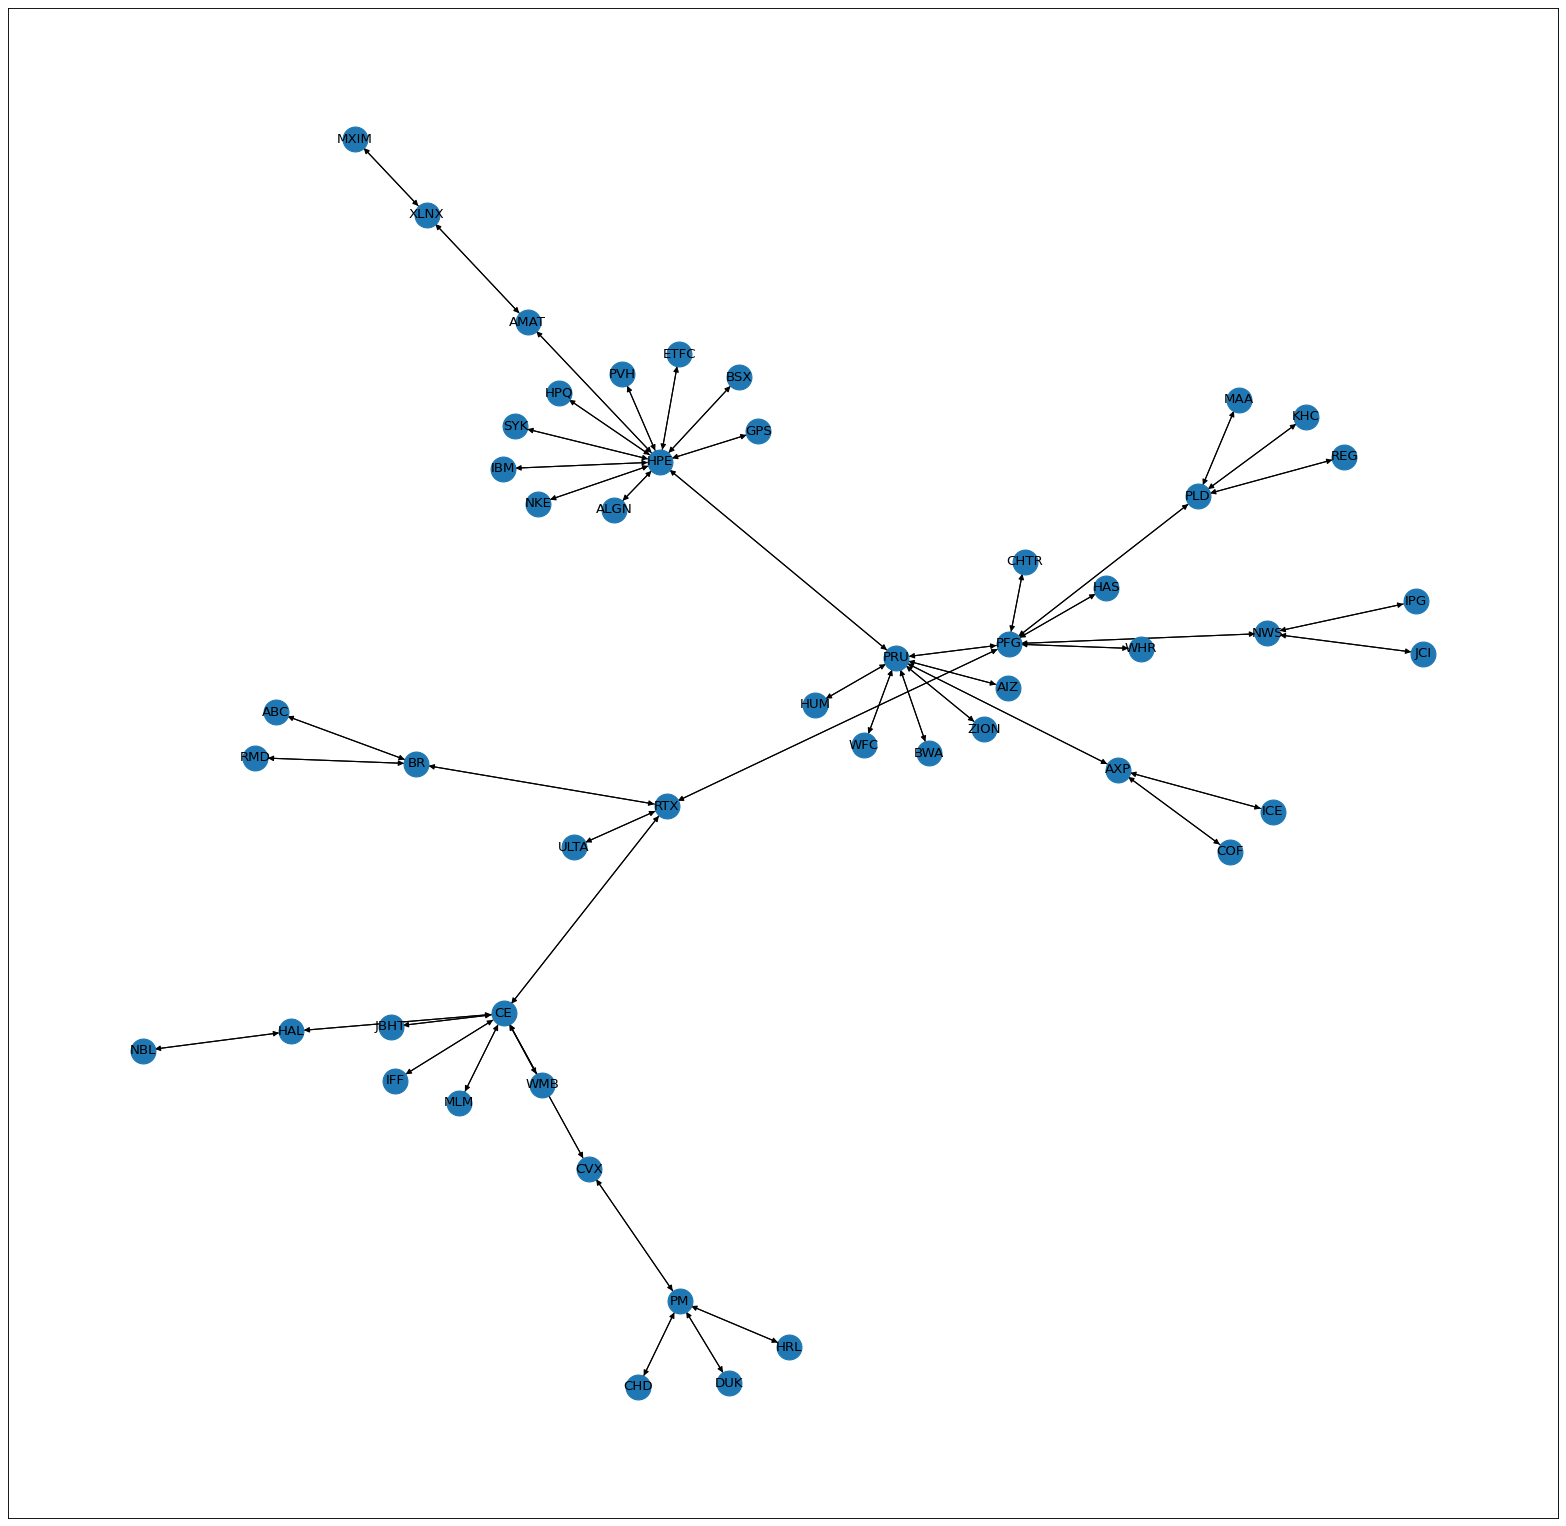

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')

df = pd.DataFrame(adjacency_matrix, columns = distance_matrix.columns, index = distance_matrix.columns)
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)
nx.draw_networkx(G, node_size=500)

plt.show()

### Visualize how each cluster is composed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


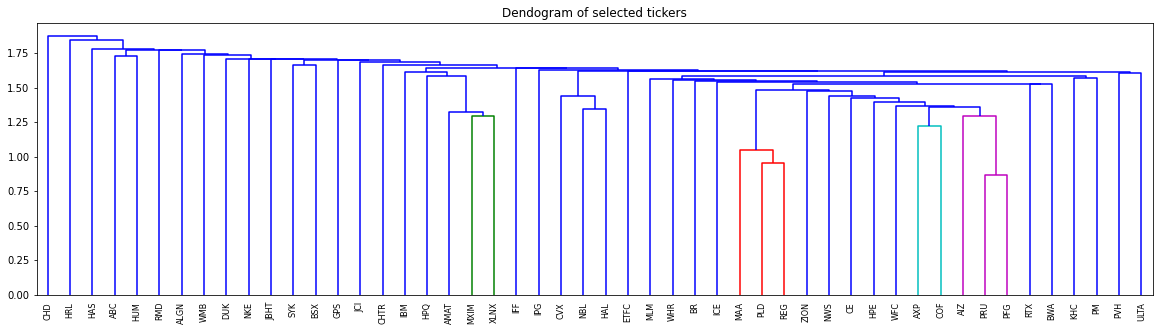

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(distance_matrix, "single")
plt.figure(figsize=(20, 5))
dendrogram(linkage_matrix, labels=distance_matrix.columns)
plt.title("Dendogram of selected tickers")
plt.show()

# Conclusion

In this notebook, I demonstrate the implementation of a minimum spanning tree to cluster stocks according to their historical correlations. However, the clusters formed with this method might be unstable; other forms of clustering may be explored as part of future research.

